In [1]:
# get the environment
import sys
import os
print(sys.version)
print(sys.executable)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\python.exe


In [2]:
# Base libraries

import pandas as pd
import numpy as np

import os
import math
from itertools import cycle

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import timedelta

# for expanding plots
from pylab import rcParams


# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
active = pd.read_csv('DigitalActive.csv')
inactive = pd.read_csv('DigitalInactive.csv')

In [4]:
active.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,10/26/2017,EASTRET
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,10/26/2017,EASTRET
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,10/26/2017,EASTRET
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,10/26/2017,EASTRET
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,10/26/2017,EASTRET


In [5]:
# create extra column
active['InitialStatus'] = 'Active'
inactive['InitialStatus'] = 'Inactive'

In [6]:
active.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,10/26/2017,EASTRET,Active
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,10/26/2017,EASTRET,Active
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,10/26/2017,EASTRET,Active
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,10/26/2017,EASTRET,Active
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,10/26/2017,EASTRET,Active


In [7]:
# stack the two files
allData = pd.concat([active,inactive],ignore_index=True)
allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,10/26/2017,EASTRET,Active
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,10/26/2017,EASTRET,Active
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,10/26/2017,EASTRET,Active
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,10/26/2017,EASTRET,Active
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,10/26/2017,EASTRET,Active


In [8]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CIS            24000 non-null  int64 
 1   FirstName      23999 non-null  object
 2   LastName       24000 non-null  object
 3   EmailAddress   23983 non-null  object
 4   LastLoginDate  24000 non-null  object
 5   TotLogins      24000 non-null  int64 
 6   SetupDate      24000 non-null  object
 7   menu_prf       24000 non-null  object
 8   InitialStatus  24000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [9]:
# create dates
allData['SetupDate'] = pd.to_datetime(allData['SetupDate'], format='%m/%d/%Y')

In [10]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CIS            24000 non-null  int64         
 1   FirstName      23999 non-null  object        
 2   LastName       24000 non-null  object        
 3   EmailAddress   23983 non-null  object        
 4   LastLoginDate  24000 non-null  object        
 5   TotLogins      24000 non-null  int64         
 6   SetupDate      24000 non-null  datetime64[ns]
 7   menu_prf       24000 non-null  object        
 8   InitialStatus  24000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.6+ MB


In [11]:
allData['LastLoginDateClean'] = pd.to_datetime(allData['LastLoginDate']).dt.date

In [12]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CIS                 24000 non-null  int64         
 1   FirstName           23999 non-null  object        
 2   LastName            24000 non-null  object        
 3   EmailAddress        23983 non-null  object        
 4   LastLoginDate       24000 non-null  object        
 5   TotLogins           24000 non-null  int64         
 6   SetupDate           24000 non-null  datetime64[ns]
 7   menu_prf            24000 non-null  object        
 8   InitialStatus       24000 non-null  object        
 9   LastLoginDateClean  24000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.8+ MB


In [13]:
allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22


In [14]:
# get the time as a string
# df[['First','Last']] = df.Name.str.split(expand=True)

allData['LoginTime'] = allData['LastLoginDate'].str.split(expand=True)[1]
allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean,LoginTime
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31,10:35
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28,13:22
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16,11:06
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29,19:03
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22,20:20


In [15]:
# clean up the time to get the hour

allData['LoginHour'] = allData['LoginTime'].str[0:2]
allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean,LoginTime,LoginHour
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31,10:35,10
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28,13:22,13
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16,11:06,11
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29,19:03,19
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22,20:20,20


In [16]:
# set categories

allData['menu_prf'] = allData['menu_prf'].astype('category')
allData['InitialStatus'] = allData['InitialStatus'].astype('category')

In [17]:
# create a reference
end = pd.datetime(2020,9,1).date()

allData['RefDate'] = end
allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean,LoginTime,LoginHour,RefDate
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31,10:35,10,2020-09-01
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28,13:22,13,2020-09-01
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16,11:06,11,2020-09-01
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29,19:03,19,2020-09-01
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22,20:20,20,2020-09-01


In [18]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CIS                 24000 non-null  int64         
 1   FirstName           23999 non-null  object        
 2   LastName            24000 non-null  object        
 3   EmailAddress        23983 non-null  object        
 4   LastLoginDate       24000 non-null  object        
 5   TotLogins           24000 non-null  int64         
 6   SetupDate           24000 non-null  datetime64[ns]
 7   menu_prf            24000 non-null  category      
 8   InitialStatus       24000 non-null  category      
 9   LastLoginDateClean  24000 non-null  object        
 10  LoginTime           24000 non-null  object        
 11  LoginHour           24000 non-null  object        
 12  RefDate             24000 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(2), o

In [19]:
# calculate the days since last login
allData['DaysSinceLogin'] = allData['RefDate'] - allData['LastLoginDateClean']

# convert to clean days using hours
allData['DaysSinceLogin'] = (allData['DaysSinceLogin'].astype('timedelta64[D]'))

# make it a whole number
allData['DaysSinceLogin'] = allData['DaysSinceLogin'].astype(int)

allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean,LoginTime,LoginHour,RefDate,DaysSinceLogin
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31,10:35,10,2020-09-01,32
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28,13:22,13,2020-09-01,35
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16,11:06,11,2020-09-01,47
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29,19:03,19,2020-09-01,34
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22,20:20,20,2020-09-01,41


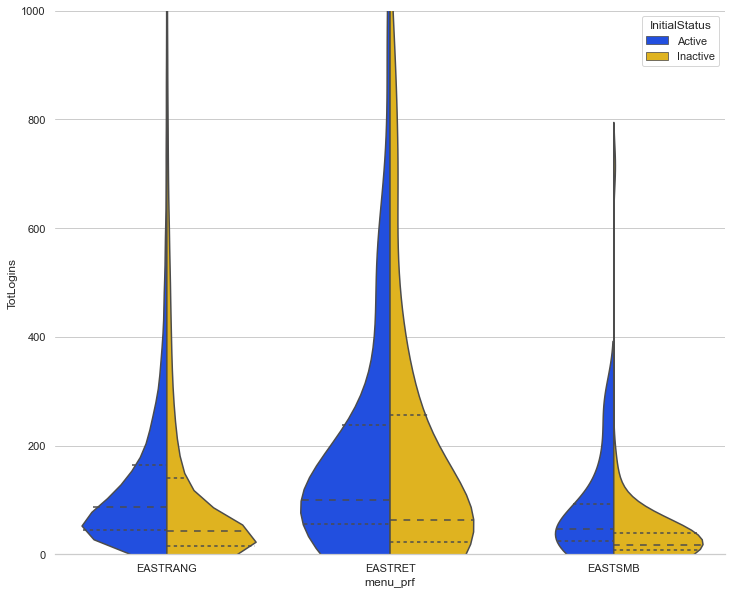

In [58]:
# do a nice violin plot
fig, ax = plt.subplots()
sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})


# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(x="menu_prf", y="TotLogins", hue="InitialStatus",
               split=True, inner="quart",
               palette={"Active": "b", "Inactive": "y"},
               data=allData)
p.set(ylim=(0, 1000))

sns.despine(left=True)

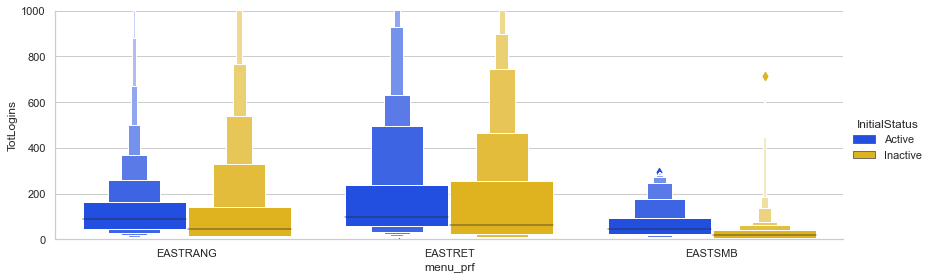

In [21]:
# do a nice boxen plot

sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})

p = sns.catplot(data = allData,
                x = 'menu_prf', y = 'TotLogins',
                hue = 'InitialStatus', kind = 'boxen',
                palette={"Active": "b", "Inactive": "y"},
                height=4,aspect=3)
p.set(ylim=(0, 1000))

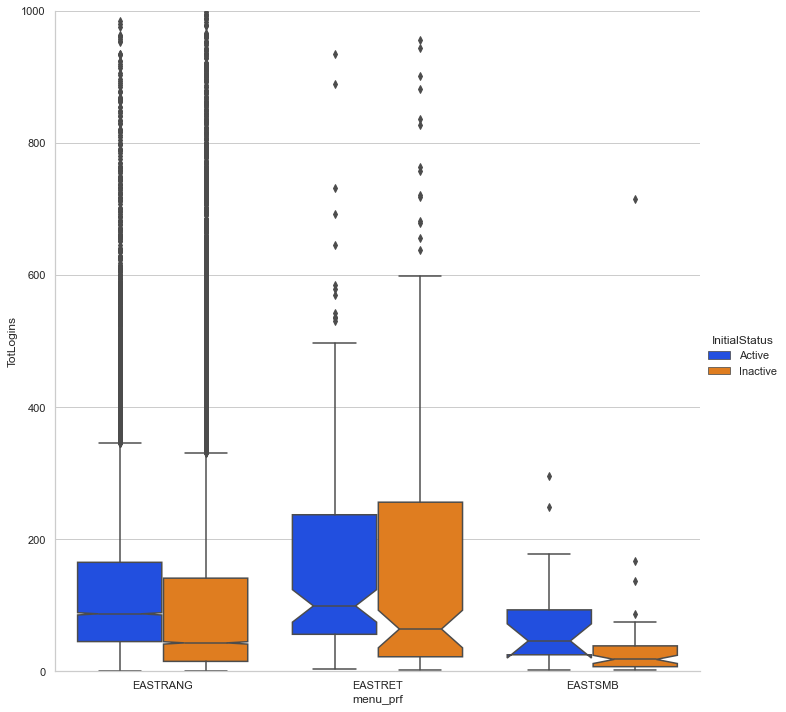

In [46]:
# do a nice box plot
sns.set(style="whitegrid", palette="bright", color_codes=True)

p = sns.catplot(data = allData,
                x = 'menu_prf', y = 'TotLogins',
                hue = 'InitialStatus', kind = 'box',
                notch = 1, height = 10, aspect = 1)
p.set(ylim=(0, 1000))

[(0.0, 1000.0)]

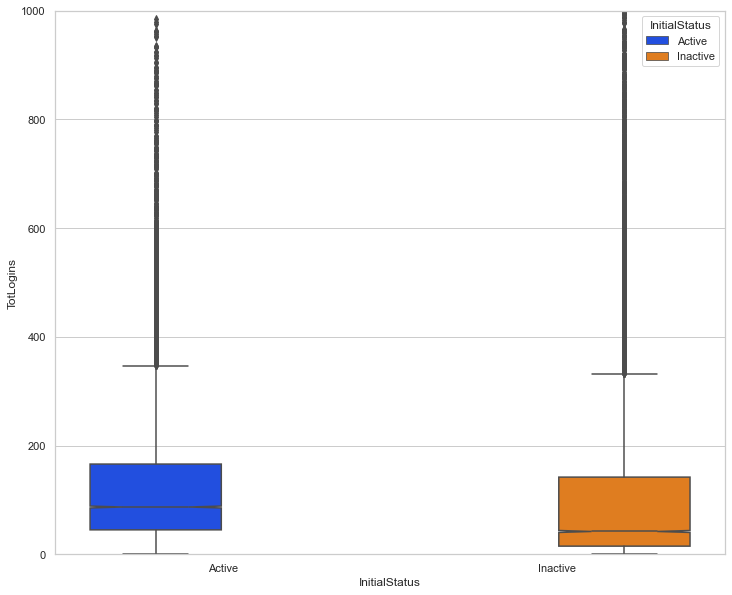

In [23]:
# do a nice box plot
sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})

p = sns.boxplot(data = allData,
                x = 'InitialStatus', y = 'TotLogins',
                hue = 'InitialStatus',
                notch = 1)
p.set(ylim=(0, 1000))

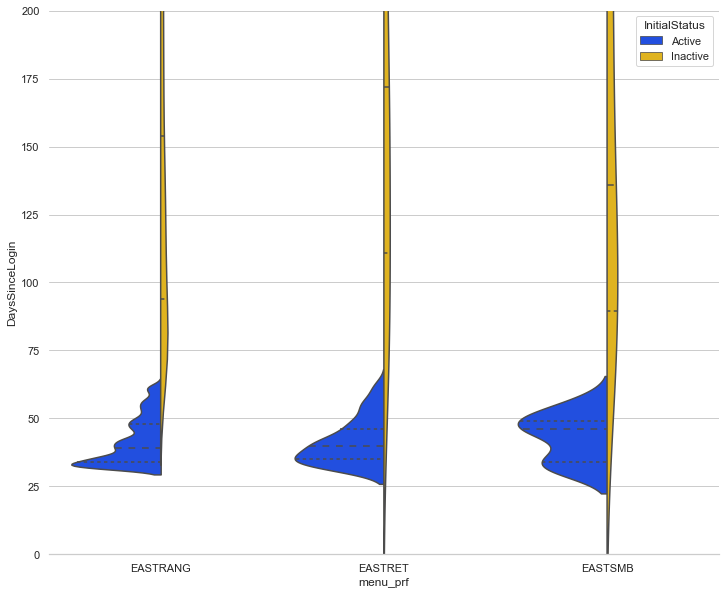

In [24]:
# do a nice violin plot

sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})


# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(x="menu_prf", y="DaysSinceLogin", hue="InitialStatus",
               split=True, inner="quart",
               palette={"Active": "b", "Inactive": "y"},
               data=allData)
p.set(ylim=(0, 200))
sns.despine(left=True)

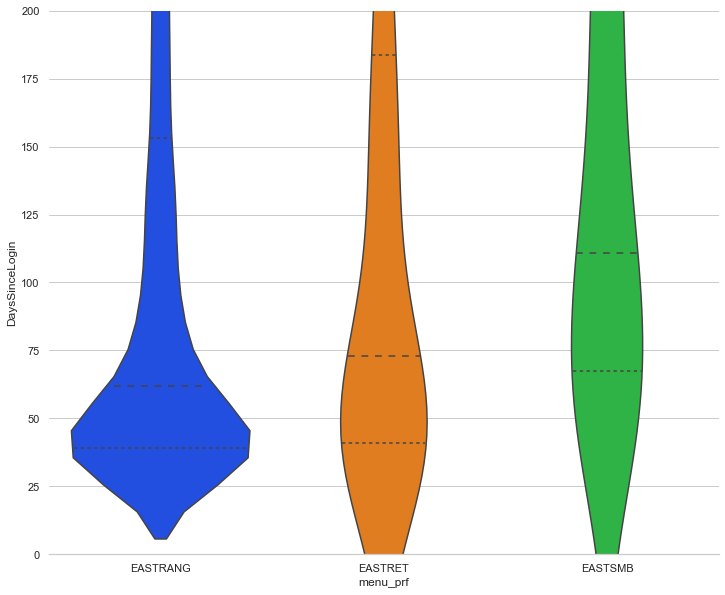

In [25]:
# do a nice violin plot

sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})


# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(x="menu_prf", y="DaysSinceLogin",
               split=True, inner="quart",
               data=allData)
p.set(ylim=(0, 200))
sns.despine(left=True)

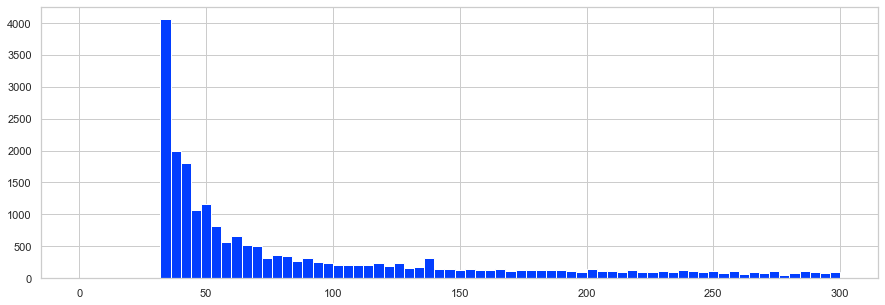

In [26]:
allData['DaysSinceLogin'].hist(bins=75, range = [0,300], align = 'mid', figsize=(15,5))

In [27]:
allData['TotLogins'].describe()

count   24000.00
mean      137.12
std       206.58
min         1.00
25%        27.00
50%        67.00
75%       158.00
max      2990.00
Name: TotLogins, dtype: float64

In [28]:
allData['DaysSinceLogin'].describe()

count   24000.00
mean      111.43
std        98.88
min        32.00
25%        39.00
50%        62.50
75%       154.00
max       965.00
Name: DaysSinceLogin, dtype: float64

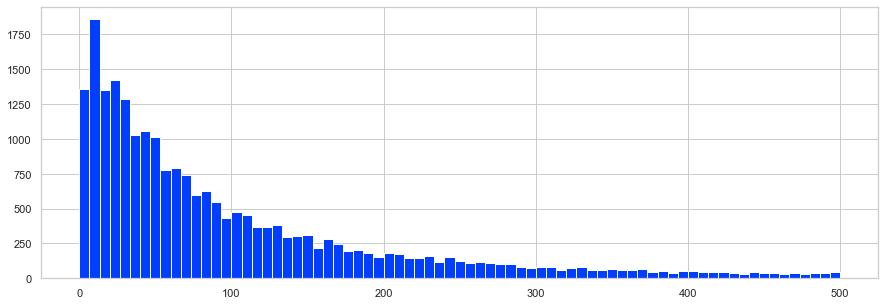

In [29]:
allData['TotLogins'].hist(bins=75, range = [0,500], align = 'mid', figsize=(15,5))

In [30]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CIS                 24000 non-null  int64         
 1   FirstName           23999 non-null  object        
 2   LastName            24000 non-null  object        
 3   EmailAddress        23983 non-null  object        
 4   LastLoginDate       24000 non-null  object        
 5   TotLogins           24000 non-null  int64         
 6   SetupDate           24000 non-null  datetime64[ns]
 7   menu_prf            24000 non-null  category      
 8   InitialStatus       24000 non-null  category      
 9   LastLoginDateClean  24000 non-null  object        
 10  LoginTime           24000 non-null  object        
 11  LoginHour           24000 non-null  object        
 12  RefDate             24000 non-null  object        
 13  DaysSinceLogin      24000 non-null  int32     

In [31]:
# create dates
allData['RefDate'] = pd.to_datetime(allData['RefDate'], format='%Y-%m-%d')

allData['DaysAcctOpen'] = allData['RefDate'] - allData['SetupDate']

# convert to clean days using hours
allData['DaysAcctOpen'] = (allData['DaysAcctOpen'].astype('timedelta64[D]'))

# make it a whole number
allData['DaysAcctOpen'] = allData['DaysAcctOpen'].astype(int)

allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean,LoginTime,LoginHour,RefDate,DaysSinceLogin,DaysAcctOpen
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31,10:35,10,2020-09-01,32,1041
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28,13:22,13,2020-09-01,35,1041
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16,11:06,11,2020-09-01,47,1041
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29,19:03,19,2020-09-01,34,1041
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22,20:20,20,2020-09-01,41,1041


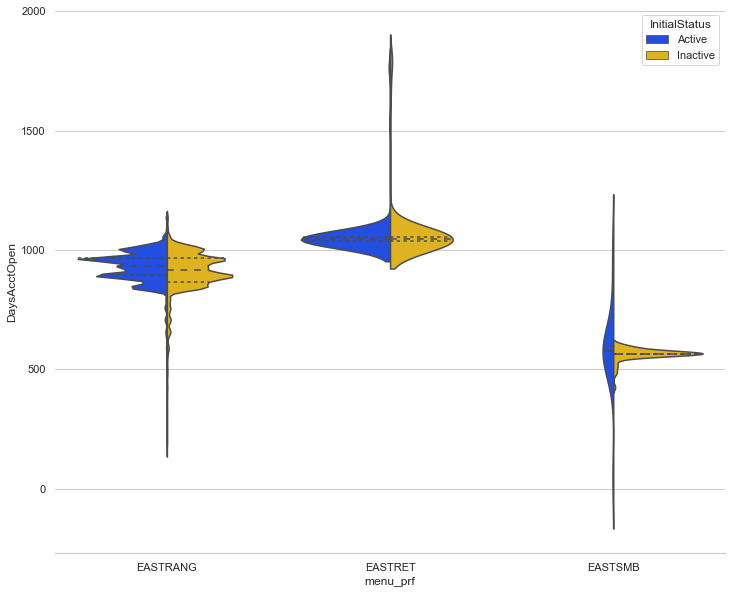

In [32]:
# do a nice violin plot

sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})


# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(x="menu_prf", y="DaysAcctOpen", hue="InitialStatus",
               split=True, inner="quart",
               palette={"Active": "b", "Inactive": "y"},
               data=allData)
# p.set(ylim=(0, 200))
sns.despine(left=True)

In [33]:
# average days between login

allData['DaysBetLogins'] = allData['DaysAcctOpen']/allData['TotLogins']
allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean,LoginTime,LoginHour,RefDate,DaysSinceLogin,DaysAcctOpen,DaysBetLogins
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31,10:35,10,2020-09-01,32,1041,15.31
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28,13:22,13,2020-09-01,35,1041,7.71
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16,11:06,11,2020-09-01,47,1041,16.52
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29,19:03,19,2020-09-01,34,1041,12.39
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22,20:20,20,2020-09-01,41,1041,14.26


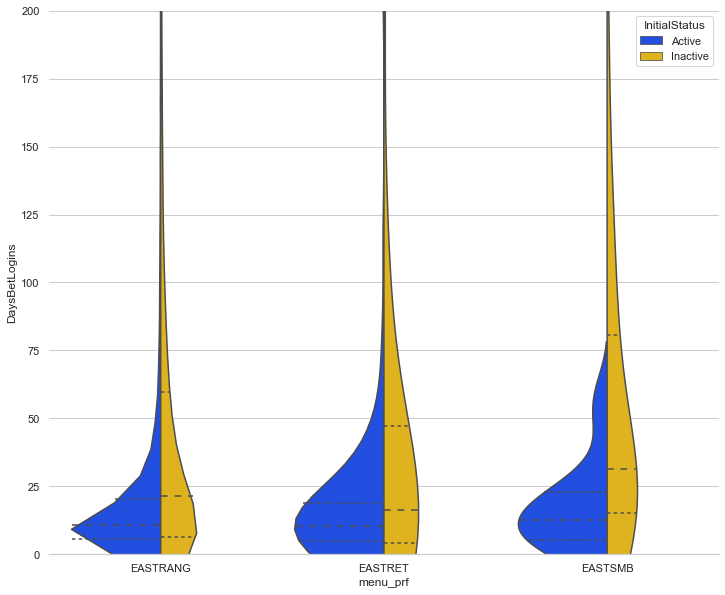

In [34]:
# do a nice violin plot

sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})


# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(x="menu_prf", y="DaysBetLogins", hue="InitialStatus",
               split=True, inner="quart",
               palette={"Active": "b", "Inactive": "y"},
               data=allData)
p.set(ylim=(0, 200))
sns.despine(left=True)

In [35]:
allData['LoginHour'] = allData['LoginHour'].str.replace(':','')

In [36]:
allData['LoginHour'].unique()

array(['10', '13', '11', '19', '20', '21', '16', '8', '17', '9', '15',
       '14', '7', '6', '18', '12', '0', '3', '22', '5', '1', '23', '2',
       '4'], dtype=object)

In [37]:
# convert login Hour to int
allData['LoginHour'] = allData['LoginHour'].astype(int)

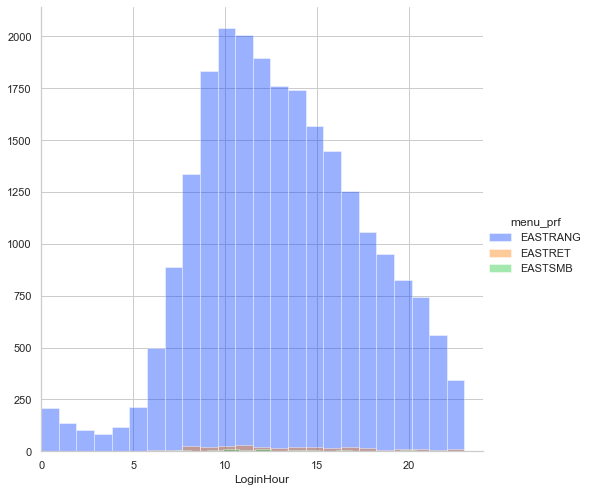

In [38]:
fig = sns.FacetGrid(data=allData, hue='menu_prf', size = 7)

fig.map(sns.distplot,'LoginHour', bins = 24, kde = False)

fig.set(xlim=(0,24))

fig.add_legend(title='menu_prf')

In [59]:
allData['SetupDate'].describe()

count                   24000
unique                    257
top       2018-03-20 00:00:00
freq                     3737
first     2015-09-29 00:00:00
last      2020-07-17 00:00:00
Name: SetupDate, dtype: object

In [81]:
cutoff = dt.datetime(2020,3,15)
cutoff

datetime.datetime(2020, 3, 15, 0, 0)

In [82]:
# make a function for Covid

def covid_id(date):
    if date < cutoff:
        return 'PreCovid'
    else:
        return 'Covid'

In [83]:
allData['LastLoginDateClean'] = pd.to_datetime(allData['LastLoginDateClean'], format='%Y-%m-%d')

allData['Covid'] = allData['LastLoginDateClean'].apply(covid_id)
allData.head()

,CIS,FirstName,LastName,EmailAddress,LastLoginDate,TotLogins,SetupDate,menu_prf,InitialStatus,LastLoginDateClean,LoginTime,LoginHour,RefDate,DaysSinceLogin,DaysAcctOpen,DaysBetLogins,Covid
0,2294542,TRACY,WOOD,TLW6464@COMCAST.NET,7/31/2020 10:35,68,2017-10-26,EASTRET,Active,2020-07-31,10:35,10,2020-09-01,32,1041,15.31,Covid
1,1544905,DAVID,BLANCO,DBLANCO@NS-DATA.COM,7/28/2020 13:22,135,2017-10-26,EASTRET,Active,2020-07-28,13:22,13,2020-09-01,35,1041,7.71,Covid
2,2295349,MYLES,WHITE,MYLESGWHITE@GMAIL.COM,7/16/2020 11:06,63,2017-10-26,EASTRET,Active,2020-07-16,11:06,11,2020-09-01,47,1041,16.52,Covid
3,2295331,BRIAN,RIZZA,BMRIZZ74@YAHOO.COM,7/29/2020 19:03,84,2017-10-26,EASTRET,Active,2020-07-29,19:03,19,2020-09-01,34,1041,12.39,Covid
4,2293218,PATRICIA,MUNDY,PMUNDY@JHANCOCK.COM,7/22/2020 20:20,73,2017-10-26,EASTRET,Active,2020-07-22,20:20,20,2020-09-01,41,1041,14.26,Covid


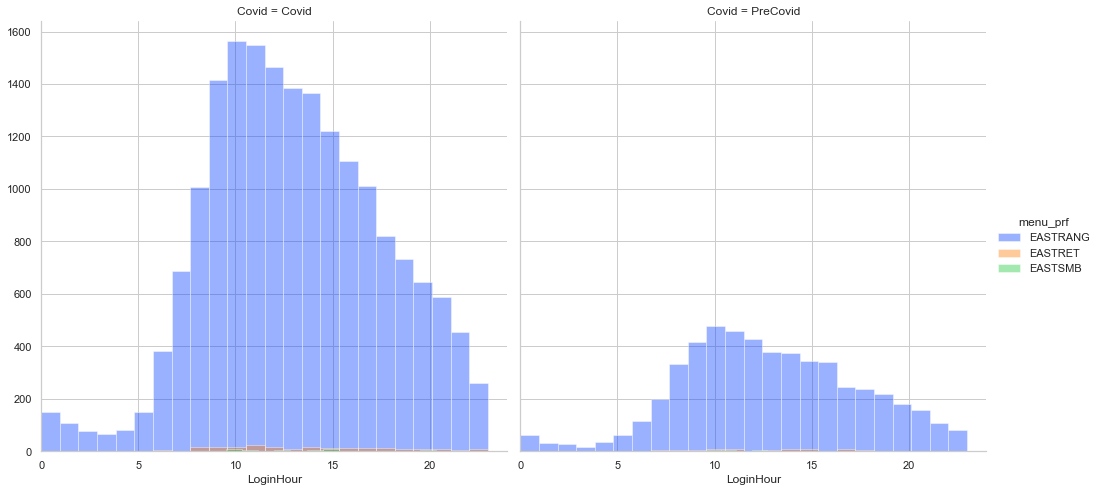

In [84]:
fig = sns.FacetGrid(data=allData, hue='menu_prf', size = 7, col = 'Covid')

fig.map(sns.distplot,'LoginHour', bins = 24, kde = False)

fig.set(xlim=(0,24))

fig.add_legend(title='menu_prf')

In [86]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CIS                 24000 non-null  int64         
 1   FirstName           23999 non-null  object        
 2   LastName            24000 non-null  object        
 3   EmailAddress        23983 non-null  object        
 4   LastLoginDate       24000 non-null  object        
 5   TotLogins           24000 non-null  int64         
 6   SetupDate           24000 non-null  datetime64[ns]
 7   menu_prf            24000 non-null  category      
 8   InitialStatus       24000 non-null  category      
 9   LastLoginDateClean  24000 non-null  datetime64[ns]
 10  LoginTime           24000 non-null  object        
 11  LoginHour           24000 non-null  int32         
 12  RefDate             24000 non-null  datetime64[ns]
 13  DaysSinceLogin      24000 non-null  int32     

In [88]:
# make year cohort
# df['date'].dt.year

allData['Cohort'] = allData['SetupDate'].dt.year

allData['Cohort'].unique()

array([2017, 2018, 2015, 2016, 2019, 2020], dtype=int64)

In [90]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CIS                 24000 non-null  int64         
 1   FirstName           23999 non-null  object        
 2   LastName            24000 non-null  object        
 3   EmailAddress        23983 non-null  object        
 4   LastLoginDate       24000 non-null  object        
 5   TotLogins           24000 non-null  int64         
 6   SetupDate           24000 non-null  datetime64[ns]
 7   menu_prf            24000 non-null  category      
 8   InitialStatus       24000 non-null  category      
 9   LastLoginDateClean  24000 non-null  datetime64[ns]
 10  LoginTime           24000 non-null  object        
 11  LoginHour           24000 non-null  int32         
 12  RefDate             24000 non-null  datetime64[ns]
 13  DaysSinceLogin      24000 non-null  int32     

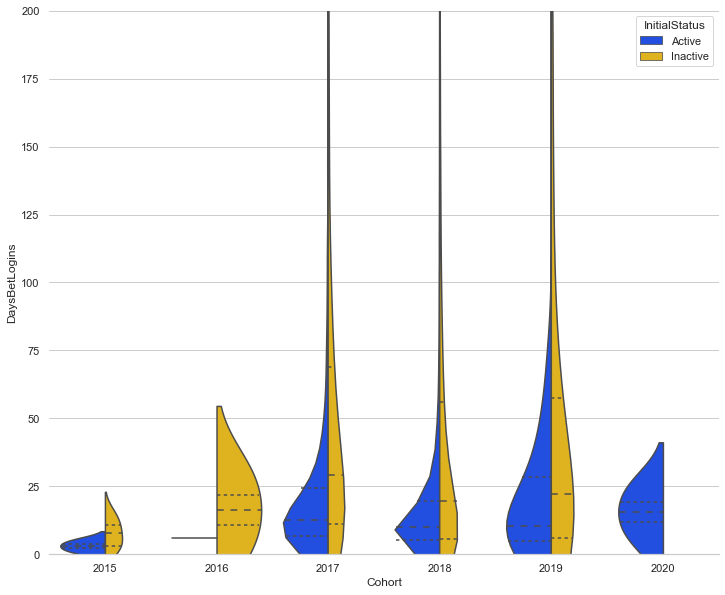

In [91]:
# do a nice violin plot

sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})


# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(x="Cohort", y="DaysBetLogins", hue="InitialStatus",
               split=True, inner="quart",
               palette={"Active": "b", "Inactive": "y"},
               data=allData)
p.set(ylim=(0, 200))
sns.despine(left=True)

In [94]:
allData['Cohort'].value_counts()

2018    19028
2017     4678
2019      281
2015        7
2020        3
2016        3
Name: Cohort, dtype: int64

In [104]:


cohortData = allData[(allData['Cohort'] > 2016) & (allData['Cohort'] < 2020)]

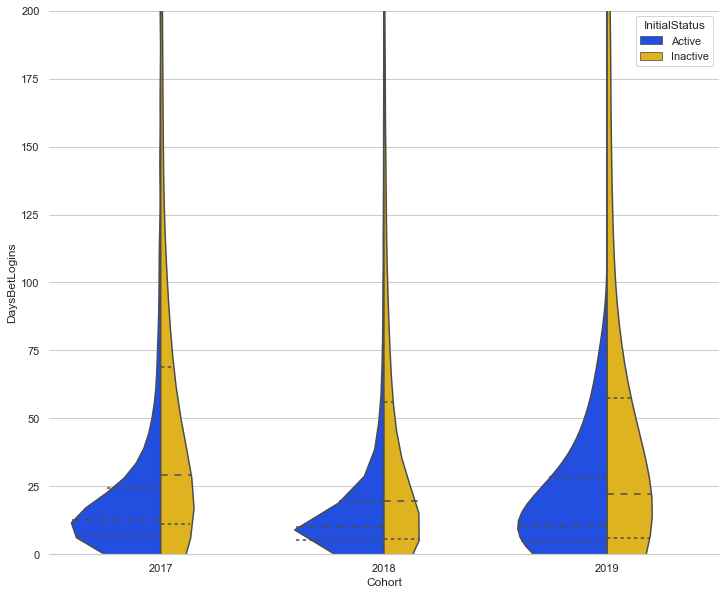

In [105]:
sns.set(style="whitegrid", palette="bright", color_codes=True, rc = {'figure.figsize':(12,10)})


# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(x="Cohort", y="DaysBetLogins", hue="InitialStatus",
               split=True, inner="quart",
               palette={"Active": "b", "Inactive": "y"},
               data=cohortData)
p.set(ylim=(0, 200))
sns.despine(left=True)